In [ ]:
pip install mediapipe

     |████████████████████████████████| 32.7 MB 148 kB/s 


In [ ]:
import cv2
%tensorflow_version 2.x
import tensorflow as tf
import numpy as np
import mediapipe as mp
from math import  acos,degrees
import os
from google.colab import drive

drive.mount('/content/gdrive')
directorio = "gdrive/My Drive/tesis/modelos/"

mp_face_mesh = mp.solutions.face_mesh
mp_face_detection = mp.solutions.face_detection
mp_drawing = mp.solutions.drawing_utils
nombres = ["erika", "ivan"]
#modelorostro = tf.keras.models.load_model("modelo de aprendizaje ivan-erika en keras2 300x300")
#modeloboca = tf.keras.models.load_model("modelo de aprendizaje ivan-erika2 boca 350x230")
modelonariz = tf.keras.models.load_model(os.path.join(directorio, "modelo de aprendizaje ivan-erika2 nariz 105x96"))
mezcla_de_predicciones = []

def prepararrostro(imagen):
    matriz_imagen = cv2.imread(imagen, cv2.IMREAD_GRAYSCALE)  # lee la imagen y la convierte a escala de grises
    #cv2.imread(os.path.join(ruta,foto), cv2.IMREAD_GRAYSCALE)
    nueva_matriz_imagen = cv2.resize(matriz_imagen, (300, 300))  # redimensiona la imagen
    return nueva_matriz_imagen.reshape(-1, 300, 300, 1)  # retorna la imagen comos e supone que fue entrenado el modelo

def prepararboca(imagen):
    matriz_imagen = cv2.imread(imagen, cv2.IMREAD_GRAYSCALE)  
    nueva_matriz_imagen = cv2.resize(matriz_imagen, (350, 230))  
    return nueva_matriz_imagen.reshape(-1, 350, 230, 1)

def prepararnariz(imagen):
    matriz_imagen = cv2.imread(imagen, cv2.IMREAD_GRAYSCALE)  
    nueva_matriz_imagen = cv2.resize(matriz_imagen, (105, 96)) 
    return nueva_matriz_imagen.reshape(-1, 105, 96, 1)

contador = 0
contadorr = 0


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from base64 import b64decode, b64encode
import PIL
import io
import html
import time

def js_to_image(js_reply):
  """
  Params:
          js_reply: JavaScript object containing image from webcam
  Returns:
          img: OpenCV BGR image
  """
  # decode base64 image
  image_bytes = b64decode(js_reply.split(',')[1])
  # convert bytes to numpy array
  jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
  # decode numpy array into OpenCV BGR image
  img = cv2.imdecode(jpg_as_np, flags=1)

  with mp_face_detection.FaceDetection(
    min_detection_confidence=0.8) as face_detection:

    with mp_face_mesh.FaceMesh(
      static_image_mode=False,
      max_num_faces=1,
      min_detection_confidence=0.8,
      min_tracking_confidence=0.75) as face_mesh:

      imgrgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
      alto, ancho, _ = img.shape
      results = face_detection.process(imgrgb)

      if results.detections is not None:
        for detection in results.detections:
            
            
            #deteccion de coordenadas de ojo 1
            x1 =int(detection.location_data.relative_keypoints[0].x * ancho)
            y1 =int(detection.location_data.relative_keypoints[0].y * alto)
            
            #deteccion de coordenadas de ojo 2
            x2 =int(detection.location_data.relative_keypoints[1].x * ancho)
            y2 =int(detection.location_data.relative_keypoints[1].y * alto)

            #creando coordenadas de cada punto
            p1 = np.array([x1, y1])
            p2 = np.array([x2, y2])
            p3 = np.array([x2, y1])

            #obteniendo distancias entre los puntos
            d1 = np.linalg.norm(p1-p2)
            d2 = np.linalg.norm(p1-p3)

            angulo = degrees(acos(d2/d1))
            
            #haciendo que el angulo sea negativo cuando se rote la cabeza
            #a la derecha
            if y1 < y2:
                angulo= -angulo

            #registrando la rotacion
            m = cv2.getRotationMatrix2D((ancho // 2, alto // 2), -angulo, 1)
            
            #crearndo nueva ventana y dandole la rotacion a la imagen
            alinear = cv2.warpAffine(img, m, (ancho,alto))
            alinear_rgb = cv2.cvtColor(alinear, cv2.COLOR_BGR2RGB)
            #cv2.imshow("alinear", alinear)


            xmin = int(detection.location_data.relative_bounding_box.xmin * ancho)
            ymin = int(detection.location_data.relative_bounding_box.ymin * alto)
            w = int(detection.location_data.relative_bounding_box.width * ancho)
            h = int(detection.location_data.relative_bounding_box.height * alto)

            if xmin < 0 or ymin < 0:
                continue

            vista_previa = alinear[ymin : ymin + h, xmin : xmin + w]

            results2 = face_mesh.process(alinear_rgb)

            cv2.imwrite('cara.jpg',vista_previa)
            #prediccionrostro = modelorostro.predict(prepararrostro('cara.jpg'))
            #prediccionrostro = np.array(prediccionrostro)
            
            if results2.multi_face_landmarks is not None:

                for face_landmarks in results2.multi_face_landmarks:

                    #mp_drawing.draw_landmarks(alinear, face_landmarks, 
                    #mp_face_mesh.FACEMESH_TESSELATION, 
                    # FACEMESH_TESSELATION CONTOURS
                    #mp_drawing.DrawingSpec(color=(255, 0, 0), thickness=1, circle_radius=1),
                    #mp_drawing.DrawingSpec(color=(0, 255, 0), thickness=1))
                    
                    #coordenadas de la nariz
                    y_164 = int(face_landmarks.landmark[164].y * alto) 
                    x_423 = int(face_landmarks.landmark[423].x * ancho)
                    x_203 = int(face_landmarks.landmark[203].x * ancho)
                    y_195 = int(face_landmarks.landmark[195].y * alto)

                    #coordenadas de la boca
                    x_234 = int(face_landmarks.landmark[234].x * ancho)
                    x_454 = int(face_landmarks.landmark[454].x * ancho)
                    y_152 = int(face_landmarks.landmark[152].y * alto)

                    #coordenadas del ojo derecho
                    y_450 = int(face_landmarks.landmark[450].y * alto) 
                    x_446 = int(face_landmarks.landmark[446].x * ancho)
                    x_465 = int(face_landmarks.landmark[465].x * ancho)
                    y_282 = int(face_landmarks.landmark[282].y * alto)

                    #coordenadas del ojo izquierdo
                    y_230 = int(face_landmarks.landmark[230].y * alto) 
                    x_245 = int(face_landmarks.landmark[245].x * ancho)
                    y_52 = int(face_landmarks.landmark[52].y * alto)
                    x_226 = int(face_landmarks.landmark[226].x * ancho)

                    #coordenadas de la frente
                    y_10 = int(face_landmarks.landmark[10].y * alto) 
                    x_103 = int(face_landmarks.landmark[103].x * ancho)
                    y_9 = int(face_landmarks.landmark[9].y * alto) 
                    x_332 = int(face_landmarks.landmark[332].x * ancho)

                    #nariz
                    #cv2.rectangle(alinear, (x_423,y_164+5), (x_203,y_195-15), (0,255,255), 2)

                    #boca
                    #cv2.rectangle(alinear, (x_216,y_164), (x_436,y_18+10), (0,255,255), 2)

                    #ojo derecho
                    #v2.rectangle(alinear, (x_446+31,y_450+3), (x_465-13,y_282-20), (255,255,255), 2)

                    #ojo izquierdo
                    #cv2.rectangle(alinear, (x_245+13, y_230+3), (x_226-31,y_52-20), (0,255,255), 2)

                    #frente
                    #cv2.rectangle(alinear, (x_103-15, y_10-15), (x_332+15, y_9-10), (0,255,255), 2)
                    
                    nariz = alinear[y_195-15 : y_164+5, x_203 : x_423]
                    nariz_shape = nariz.shape
                    boca = alinear[y_164-20 : y_152+30, x_234-20 : x_454+20]
                    #boca = alinear[y_164 : y_18+10, x_216 : x_436]
                    boca_shape = boca.shape
                    ojo_derecho = alinear[y_282-20 : y_450+3, x_465-13 : x_446+31]
                    ojo_derecho_shape = ojo_derecho.shape
                    ojo_izquierdo = alinear[y_52-20 : y_230+3, x_226-31 : x_245+13]
                    ojo_izquierdo_shape = ojo_izquierdo.shape
                    frente = alinear[y_10-15 : y_9-10, x_103-15 : x_332+15]
                    frente_shape=frente.shape
                    
                    partes_rostro = [nariz, boca, ojo_derecho, ojo_izquierdo, frente]

                    
                    #if boca_shape[0]>0 and boca_shape[1]>0:
                        #cv2.imwrite('boca.jpg',boca)
                        #prediccionboca = modeloboca.predict(prepararboca('boca.jpg'))
                        #prediccionboca = np.array(prediccionboca)
                        #mezcla_de_predicciones.append(prediccion)
                        #print(prediccionboca)

                    if nariz_shape[0]>0 and nariz_shape[1]>0:
                        cv2.imwrite('nariz.jpg',nariz)
                        prediccionnariz = modelonariz.predict(prepararnariz('nariz.jpg'))
                        #prediccionnariz = np.array(prediccionnariz)
                        #mezcla_de_predicciones.append(prediccion)
                        print(prediccionnariz)

                    # if ojo_derecho_shape[0]>0 and ojo_derecho_shape[1]>0:
                    #     cv2.imwrite('ojo derechp.jpg',ojo_derecho)
                    #     prediccion = modelo.predict(prepararboca('ojo derecho.jpg'))
                    #     mezcla_de_predicciones.append(prediccion)
                    #     print(prediccion)

                    # if ojo_izquierdo_shape[0]>0 and ojo_izquierdo_shape[1]>0:
                    #     cv2.imwrite('ojo izquierdo.jpg',ojo_izquierdo)
                    #     prediccion = modelo.predict(prepararboca('ojo izquierdo.jpg'))
                    #     mezcla_de_predicciones.append(prediccion)
                    #     print(prediccion)

                    # if frente_shape[0]>0 and frente_shape[1]>0:
                    #     cv2.imwrite('frente.jpg',frente)
                    #     prediccion = modelo.predict(prepararboca('frente.jpg'))
                    #     mezcla_de_predicciones.append(prediccion)
                    #     print(prediccion)

                # if prediccionnariz[0,1] >= 0.8 and prediccionboca[0,1] >= 0.8 and prediccionrostro[0,1] >= 0.8:
                #     print(nombres[1])
                #     cv2.line(video,(xmin,ymin),(xmin+60,ymin),(255,0,0),5)
                #     cv2.line(video,(xmin,ymin),(xmin,ymin+60),(255,0,0),5)
                #     cv2.line(video,(xmin + w,ymin),(xmin+w-60,ymin),(255,0,0),5)
                #     cv2.line(video,(xmin + w,ymin),(xmin+w,ymin+60),(255,0,0),5)
                #     cv2.line(video,(xmin,ymin+h),(xmin,ymin+h-60),(255,0,0),5)
                #     cv2.line(video,(xmin,ymin+h),(xmin+60,ymin+h),(255,0,0),5)
                #     cv2.line(video,(xmin + w,ymin+h),(xmin+w,ymin+h-60),(255,0,0),5)
                #     cv2.line(video,(xmin + w,ymin+h),(xmin+w-60,ymin+h),(255,0,0),5)
                #     cv2.putText(video, "ivan", (xmin,ymin),cv2.FONT_HERSHEY_SIMPLEX, 2, (255, 0, 0), 2)
                    
                # if prediccionnariz[0,0] >= 0.8 and prediccionboca[0,0] >= 0.8 and prediccionrostro[0,0] >= 0.8:
                #     print(nombres[0])
                #     cv2.line(video,(xmin,ymin),(xmin+60,ymin),(0,0,255),5)
                #     cv2.line(video,(xmin,ymin),(xmin,ymin+60),(0,0,255),5)
                #     cv2.line(video,(xmin + w,ymin),(xmin+w-60,ymin),(0,0,255),5)
                #     cv2.line(video,(xmin + w,ymin),(xmin+w,ymin+60),(0,0,255),5)
                #     cv2.line(video,(xmin,ymin+h),(xmin,ymin+h-60),(0,0,255),5)
                #     cv2.line(video,(xmin,ymin+h),(xmin+60,ymin+h),(0,0,255),5)
                #     cv2.line(video,(xmin + w,ymin+h),(xmin+w,ymin+h-60),(0,0,255),5)
                #     cv2.line(video,(xmin + w,ymin+h),(xmin+w-60,ymin+h),(0,0,255),5)
                #     cv2.putText(video, "erika", (xmin,ymin),cv2.FONT_HERSHEY_SIMPLEX, 2, (0, 0, 255), 2)

                    #if prediccion[0,2] >= 0.8:
                    #print(nombres[2])
                    #mezcla_de_predicciones_nombres=[]
                    #mezcla_de_predicciones_array = np.array(mezcla_de_predicciones)
                    #print(mezcla_de_predicciones)
                    print("--------------------------------------")

                    #mezcla_de_predicciones=[]
                    #mezcla_de_predicciones_array = np.array(mezcla_de_predicciones_array).reshape(6,1
                
                    
                    #mezcla_de_predicciones=np.array(mezcla_de_predicciones)
            
                    #cv2.imshow('vista previa', nariz)

                    #cv2.imshow('imagen', alinear)

    return img

In [ ]:
def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)

  # get photo data
  data = eval_js('takePhoto({})'.format(quality))
  # get OpenCV format image
  img = js_to_image(data) 

  # save image
  cv2.imwrite(filename, img)

  return filename

<IPython.core.display.Javascript object>

[[1. 0.]]
--------------------------------------
Saved to photo.jpg


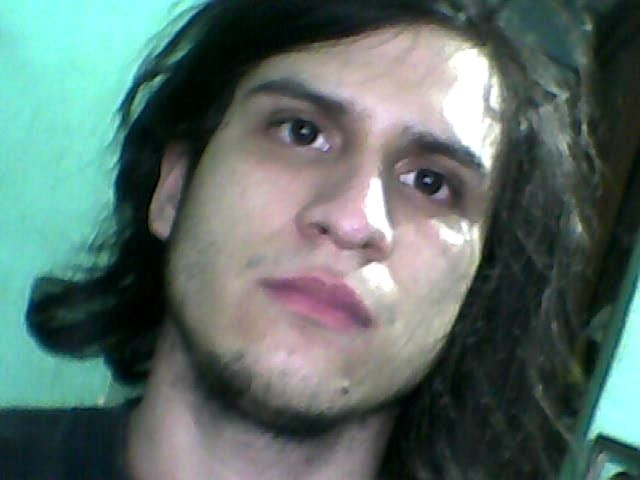

In [ ]:
try:
  filename = take_photo('photo.jpg')
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

<IPython.core.display.Javascript object>